In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import backend

Using TensorFlow backend.


In [4]:

def _x(t,data):
    return 0 if t < 0 else data[t]

def x(t,data):
    beta = 0.2
    gamma = 0.1
    tau = 25
    n = 10
    return _x(t-1,data) + (beta*_x(t-tau-1,data))/(1+_x(t-tau-1,data)**n) - gamma*_x(t-1,data)

def mackey_glass_generator():


    N = 2000

    data = np.zeros(N)
    data[0] = 1.5

    for t in range(1,N):
        data[t] = x(t,data)

    return data
def get_train_test_data(x):
    train_set = np.zeros([1000,5])
    train_labels = np.zeros([1000])
    
    for t in range(300,1300):
        train_set[t-300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        train_labels[t-300] = x[t+5] 

    test_set = np.zeros([200,5])
    test_labels = np.zeros([200])
    
    for t in range(1300,1500):
        test_set[t-1300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        test_labels[t-1300] = x[t+5] 
        
    return train_set, train_labels, test_set, test_labels

def init_network(num_nodes, lambd):
    if len(num_nodes) < 1:
        return None

    model = Sequential()

    num_layers = len(num_nodes)
    model.add(Dense(num_nodes[0], input_dim=5, kernel_initializer='normal', activation='relu',use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    for i in range(1, num_layers):
        model.add(Dense(num_nodes[i], kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    model.add(Dense(1, kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    #not sparse data so we use L2 reg
    model.summary()
    sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='mse',metrics=['MSE'])
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, min_delta=0.001, patience=100)
    return model, es

2000


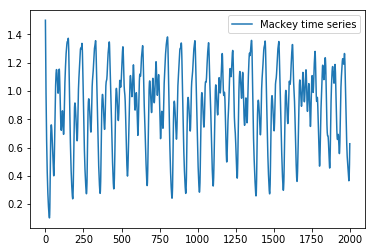

In [5]:
x = mackey_glass_generator()
print(len(x))
t = np.arange(len(x))
plt_A, = plt.plot(t,x, label='Mackey time series')
plt.legend(handles=[plt_A])
plt.show()

In [13]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

train_set, train_labels, test_set, test_labels = get_train_test_data(x)
nodes_first_layer = [2,4,6,8]

lamb = 0.0
#lamb = 1e-4
rounds = 10
MSE_test_round = np.zeros((len(nodes_first_layer),rounds))
for i in range(rounds):
    MSE_test = np.zeros(len(nodes_first_layer))
    for k in range(len(nodes_first_layer)):
        print("Nodes hidden layer: ", nodes_first_layer[k])

        #if hidden_nodes_first_layer[j] > hidden_nodes_second_layer[i]:
        model, early_stopping = init_network([nodes_first_layer[k]],lamb)
        history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=0)

        predictions = model.predict(test_set, verbose=0)
        print("MSE training:",history.history['MSE'][-1])
        print("MSE val:",history.history['val_MSE'][-1])
        test_mse = error_mse(test_labels,predictions)
        MSE_test[k] = test_mse
        print("MSE test: ", test_mse)
        """
        fig = plt.figure(figsize=(12,12))
        ax1 = fig.add_subplot(311)
        ax2 = fig.add_subplot(312)
        ax3 = fig.add_subplot(313)

        # Plot training & validation accuracy valuesa
        ax1.plot(history.history['MSE'])
        ax1.plot(history.history['val_MSE'])
        ax1.set_title('Mean squared error, nPerceptrons='+str(nodes_first_layer[k]))
        ax1.set_ylabel('MSE')
        ax1.set_xlabel('Epoch')
        ax1.legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        ax2.plot(history.history['loss'])
        ax2.plot(history.history['val_loss'])
        ax2.set_title('Model loss, nPerceptrons='+str(nodes_first_layer[k]))
        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epoch')
        ax2.legend(['Train', 'Test'], loc='upper left')

        keras.backend.clear_session()
        t = np.arange(301,len(x)-500)

        ax3.plot(t,x[301:len(x)-500])
        ax3.plot(range(1300,1500),predictions,'ro',markersize=2)
        ax3.set_xlabel("time step")
        ax3.set_ylabel("x")
        ax3.set_title("Mackey-Glass Time Series (x(0) = 1.5)")
        ax3.set_xlim([1200,1500])
        
        plt.show()
        """
    MSE_test_round[:,i] = MSE_test


Nodes hidden layer:  2
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 2)                 12        
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 00212: early stopping
MSE training: 0.009618082
MSE val: 0.009019054472446442
MSE test:  0.18409750469469435
Nodes hidden layer:  4
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 4)                 24        
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 5         
Total

Epoch 00399: early stopping
MSE training: 0.0013847672
MSE val: 0.0013672721106559038
MSE test:  0.19196840446977925
Nodes hidden layer:  2
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 2)                 12        
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934375
MSE val: 0.907838761806488
MSE test:  0.8409943688864523
Nodes hidden layer:  4
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 4)                 24        
__________________________

Epoch 00264: early stopping
MSE training: 0.009313321
MSE val: 0.009473606012761593
MSE test:  0.18371181544848175
Nodes hidden layer:  8
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 8)                 48        
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 9         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 00315: early stopping
MSE training: 0.0014865373
MSE val: 0.0012991970870643854
MSE test:  0.1937219761544149
Nodes hidden layer:  2
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 2)                 12        
_____________________

Epoch 00101: early stopping
MSE training: 0.89343756
MSE val: 0.907838761806488
MSE test:  0.8409943688864523
Nodes hidden layer:  6
Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 6)                 36        
_________________________________________________________________
dense_190 (Dense)            (None, 1)                 7         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343756
MSE val: 0.907838761806488
MSE test:  0.8409943688864523
Nodes hidden layer:  8
Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 8)                 48        
________________________________

[0.18422774 0.84099437 0.19372765 0.19291507]


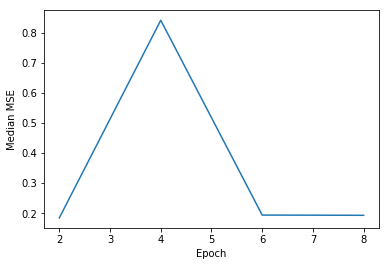

In [15]:
med = np.median(MSE_test_round, axis=1)
plt.plot([2,4,6,8],med)
plt.ylabel('Median MSE')
plt.xlabel('Epoch')
print(med)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 9         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 00421: early stopping
MSE training: 0.0042303805
MSE val: 0.0040616258047521114


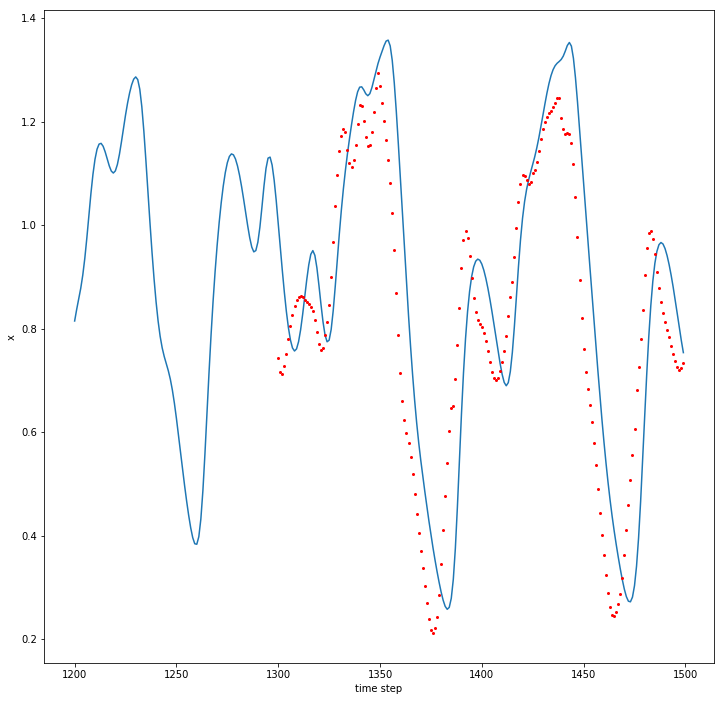

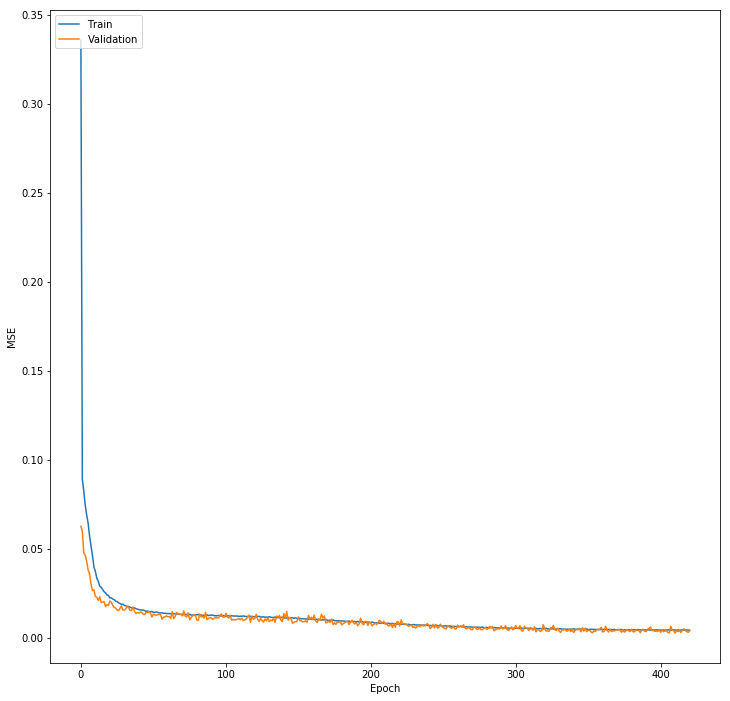

In [56]:
nPerceptron = 8
lamb = 1e-3
model, early_stopping = init_network([nPerceptron],lamb)

history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=0)

predictions = model.predict(test_set, verbose=0)

print("MSE training:",history.history['MSE'][-1])
print("MSE val:",history.history['val_MSE'][-1])

fig = plt.figure(figsize=(12,12))
#ax1 = fig.add_subplot(111)
plt.plot()
t = np.arange(1200,len(x)-500)

plt.plot(t,x[1200:len(x)-500])
plt.plot(range(1300,1500),predictions,'ro',markersize=2)
plt.xlabel("time step")
plt.ylabel("x")
plt.savefig("4.3.1_mackie_e2.png")
#plt.set_title("Mackey-Glass Time Series (x(0) = 1.5)")
#print(history.history['MSE'])
fig = plt.figure(figsize=(12,12))
plt.plot(history.history['MSE'])
plt.plot(history.history['val_MSE'])
#plt.plot(np.arange(len(history.history['MSE'])))
#plt.set_title('Mean squared error, nPerceptrons='+str(nodes_first_layer[k]))
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("4.3.1_MSE_e2.png")

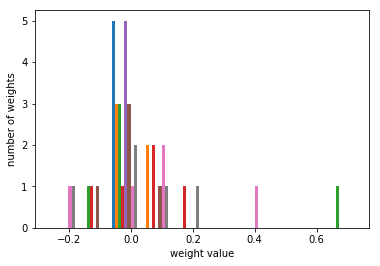

In [57]:
weights, biases = model.layers[0].get_weights()
plt.hist(weights)
plt.xlabel("weight value")
plt.ylabel("number of weights")
plt.savefig('weights1e3')
#plt.title("Weight distribution for 8 nodes, lambda = e-4")